In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

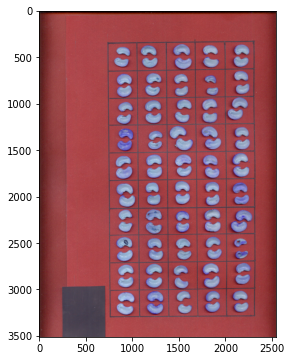

In [2]:
# Leitura da imagem BGR
imagem_cv2 = cv2.imread("sementes1.jpeg")
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_cv2)
plt.show()

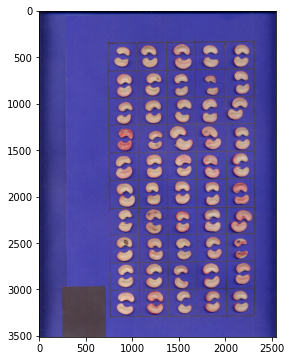

In [3]:
# Conversão para RGB
imagem = cv2.cvtColor(imagem_cv2, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem)
plt.show()

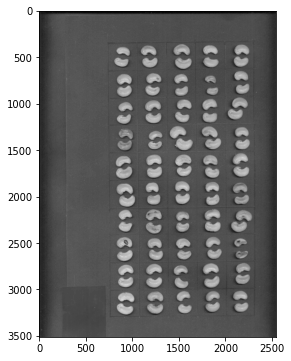

In [4]:
# Conversao para escala de cinza
imagem_cinza = cv2.cvtColor(imagem_cv2, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_cinza, cmap = 'gray')
plt.show()

In [5]:
# Leitura das dimensões da imagem
[x, y] = np.shape(imagem_cinza)
print(x, y)

3510 2550


In [6]:
# Separação dos canais da imagem
imagem_vermelha, imagem_verde, imagem_azul = cv2.split(imagem)

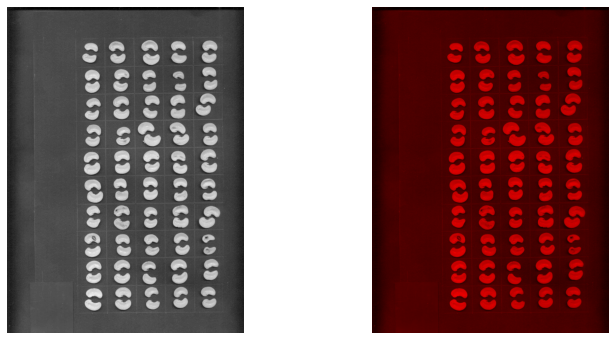

In [7]:
# Visualização da parte vermelha
zeros = np.zeros(imagem.shape[:2], dtype="uint8")
fig = plt.figure(figsize=(12, 6))
plt.subplot(121); plt.axis("off"); plt.imshow(imagem_vermelha, cmap = 'gray')
plt.subplot(122); plt.axis("off"); plt.imshow(cv2.merge([imagem_vermelha, zeros, zeros]))
plt.show()

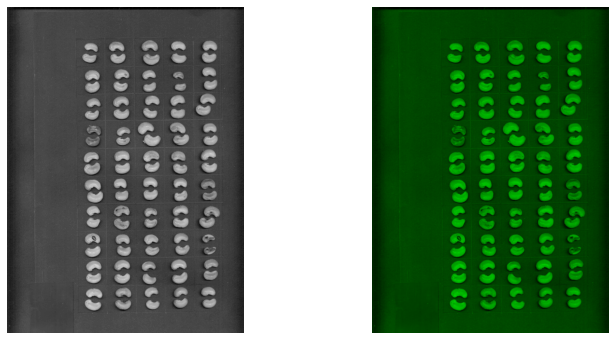

In [8]:
# Visualização da parte verde
fig = plt.figure(figsize=(12, 6))
plt.subplot(121); plt.axis("off"); plt.imshow(imagem_verde, cmap = 'gray')
plt.subplot(122); plt.axis("off"); plt.imshow(cv2.merge([zeros, imagem_verde, zeros]))
plt.show()

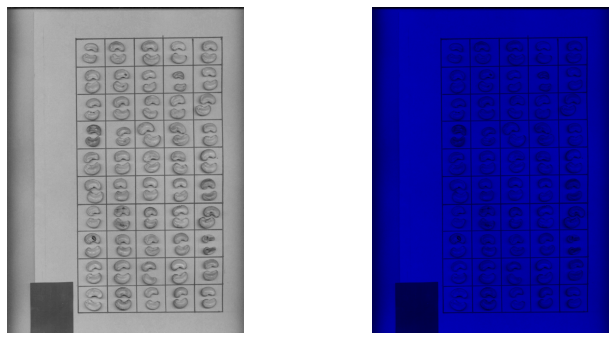

In [9]:
# Visualização da parte azul
fig = plt.figure(figsize=(12, 6))
plt.subplot(121); plt.axis("off"); plt.imshow(imagem_azul, cmap = 'gray')
plt.subplot(122); plt.axis("off"); plt.imshow(cv2.merge([zeros, zeros, imagem_azul]))
plt.show()

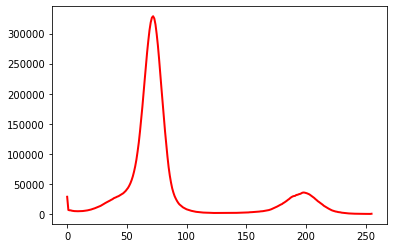

In [10]:
# Histograma vermelho
hist_red = cv2.calcHist([imagem],[0],None,[256],[0,256])
plt.plot(hist_red,color='red',lw=2)
plt.show()

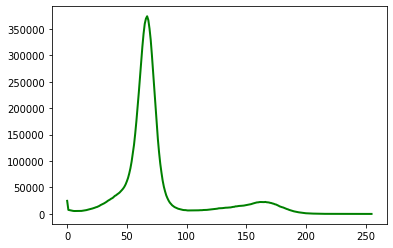

In [11]:
# Histograma verde
hist_green = cv2.calcHist([imagem],[1],None,[256],[0,256])
plt.plot(hist_green,color='green',lw=2)
plt.show()

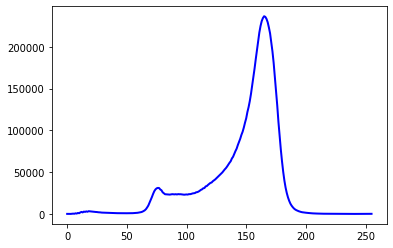

In [12]:
# Histograma azul
hist_blue = cv2.calcHist([imagem],[2],None,[256],[0,256])
plt.plot(hist_blue,color='blue',lw=2)
plt.show()

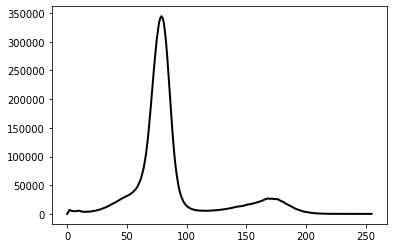

In [13]:
# Histograma cinza
hist = cv2.calcHist([imagem_cinza],[0],None,[256],[0,256])
plt.plot(hist,color='black',lw=2)
plt.show()

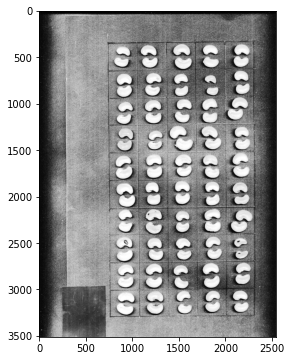

In [14]:
# Equalização de histograma
imagem_equalizada = cv2.equalizeHist(imagem_cinza)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_equalizada, cmap = 'gray')
plt.show()

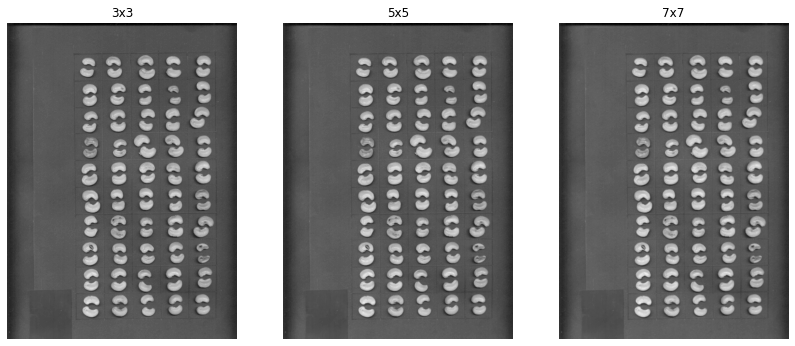

In [15]:
# Filtro da média
imagem_media3 = cv2.blur(imagem_cinza,(3,3))
imagem_media5 = cv2.blur(imagem_cinza,(5,5))
imagem_media7 = cv2.blur(imagem_cinza,(7,7))

fig = plt.figure(figsize=(14, 8))
plt.subplot(131);plt.axis("off"); plt.imshow(imagem_media3,cmap='gray')
plt.title("3x3")
plt.subplot(132);plt.axis("off"); plt.imshow(imagem_media5,cmap='gray')
plt.title("5x5")
plt.subplot(133);plt.axis("off"); plt.imshow(imagem_media7,cmap='gray')
plt.title("7x7")
plt.show()

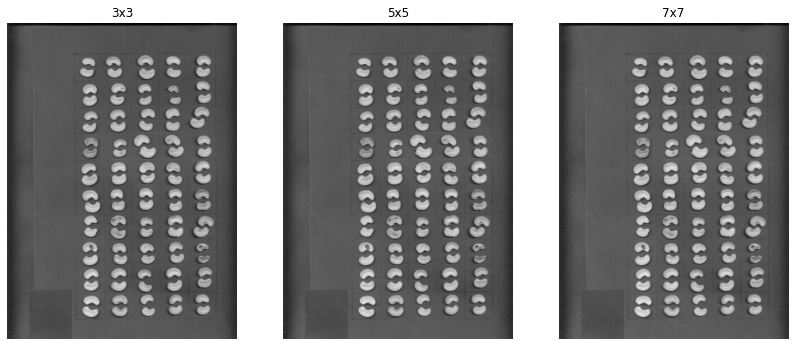

In [16]:
# Filtro da mediana
imagem_mediana3 = cv2.medianBlur(imagem_cinza,3)
imagem_mediana5 = cv2.medianBlur(imagem_cinza,5)
imagem_mediana7 = cv2.medianBlur(imagem_cinza,7)

fig = plt.figure(figsize=(14, 8))
plt.subplot(131);plt.axis("off"); plt.imshow(imagem_mediana3,cmap='gray')
plt.title("3x3")
plt.subplot(132);plt.axis("off"); plt.imshow(imagem_mediana5,cmap='gray')
plt.title("5x5")
plt.subplot(133);plt.axis("off"); plt.imshow(imagem_mediana7,cmap='gray')
plt.title("7x7")
plt.show()

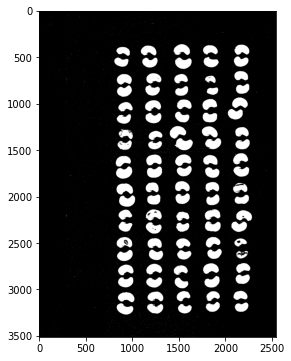

In [17]:
# Aplicando filtro do limiar
T,imagem_limiar = cv2.threshold(imagem_cinza,115, 255,cv2.THRESH_BINARY)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_limiar, cmap = 'gray')
plt.show()

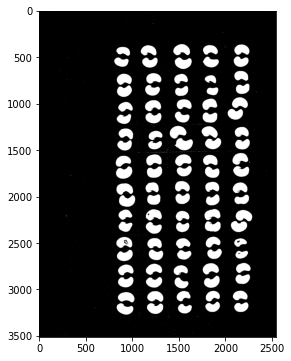

In [18]:
# Aplicando o filtro do limiar na componente vermelha
T,imagem_vermelha_limiar = cv2.threshold(imagem_vermelha,115, 255,cv2.THRESH_BINARY)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_vermelha_limiar, cmap = 'gray')
plt.show()

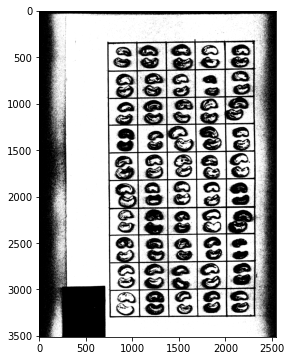

In [19]:
# Aplicando o filtro do limiar na componente azul
T,imagem_azul_limiar = cv2.threshold(imagem_azul,150, 255,cv2.THRESH_BINARY)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_azul_limiar, cmap = 'gray')
plt.show()

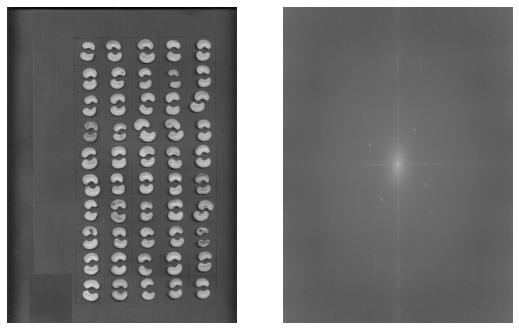

In [20]:
# Visualizando o espectro de magnitude da transformada de Fourier por meio da Transformada de Fourier Rápida (FFT)
f = np.fft.fft2(imagem_cinza)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 100*np.log(np.abs(fshift))

fig = plt.figure(figsize=(14,10))
plt.subplot(131); plt.axis("off"); plt.imshow(imagem_cinza,cmap='gray')
plt.subplot(132); plt.axis("off"); plt.imshow(magnitude_spectrum,cmap='gray')

plt.show()

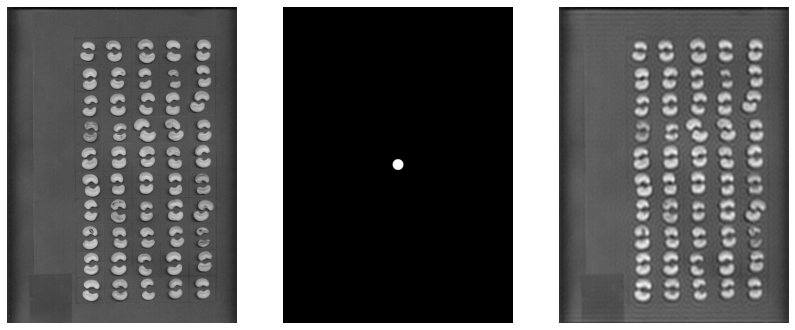

In [54]:
# Aplicando filtro passa-baixas no domínio da frequência
raio = 60
mask = np.zeros_like(imagem_cinza)


cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), raio, (255,255,255), -1)[0]


dft_shift_masked = np.multiply(fshift,mask) / 255
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked)
imagem_filtrada1 = np.abs(img_filtered).clip(0,255).astype(np.uint8)

fig = plt.figure(figsize=(14,10))
plt.subplot(131); plt.axis("off"); plt.imshow(imagem_cinza,cmap='gray')
plt.subplot(132); plt.axis("off"); plt.imshow(mask,cmap='gray')
plt.subplot(133); plt.axis("off"); plt.imshow(imagem_filtrada1,cmap='gray')

plt.show()

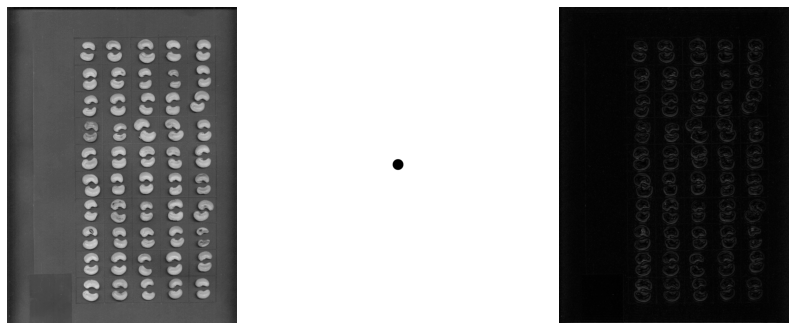

In [22]:
# Aplicando filtro passa-altas no domínio da frequência
raio = 60
mask = np.zeros_like(imagem_cinza)
cv2.circle(mask, (cx,cy), raio, (255,255,255),-1)[0]


dft_shift_masked = np.multiply(fshift, 255-mask) / 255
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked)
imagem_filtrada2 = np.abs(img_filtered).clip(0,255).astype(np.uint8)

fig = plt.figure(figsize=(14,10))
plt.subplot(131); plt.axis("off"); plt.imshow(imagem_cinza,cmap='gray')
plt.subplot(132); plt.axis("off"); plt.imshow(255-mask,cmap='gray')
plt.subplot(133); plt.axis("off"); plt.imshow(imagem_filtrada2,cmap='gray')

plt.show()

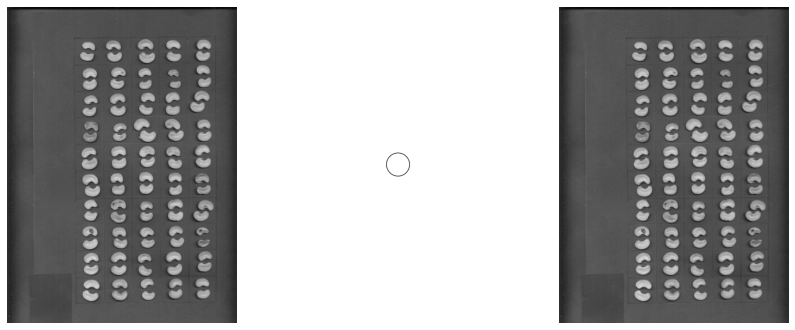

In [23]:
# Aplicando filtro rejeita-banda no domínio da frequência
radius = 128
mask = np.zeros_like(imagem_cinza)
cv2.circle(mask, (cx,cy), radius, (255,255,255),5)[0]


dft_shift_masked = np.multiply(fshift, 255-mask) / 255
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked)
imagem_filtrada3 = np.abs(img_filtered).clip(0,255).astype(np.uint8)

fig = plt.figure(figsize=(14,10))
plt.subplot(131); plt.axis("off"); plt.imshow(imagem_cinza,cmap='gray')
plt.subplot(132); plt.axis("off"); plt.imshow(255-mask,cmap='gray')
plt.subplot(133); plt.axis("off"); plt.imshow(imagem_filtrada3,cmap='gray')

plt.show()

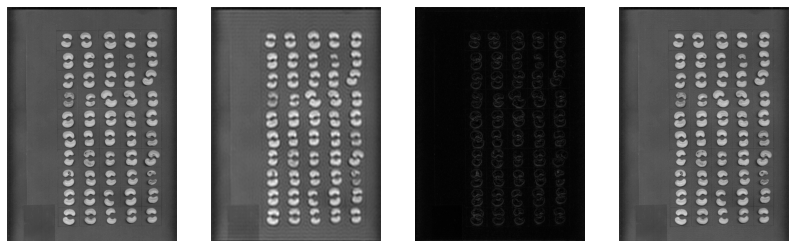

In [24]:
fig = plt.figure(figsize=(14,10))
plt.subplot(141); plt.axis("off"); plt.imshow(imagem_cinza,cmap='gray')
plt.subplot(142); plt.axis("off"); plt.imshow(imagem_filtrada1,cmap='gray')
plt.subplot(143); plt.axis("off"); plt.imshow(imagem_filtrada2,cmap='gray')
plt.subplot(144); plt.axis("off"); plt.imshow(imagem_filtrada3,cmap='gray')

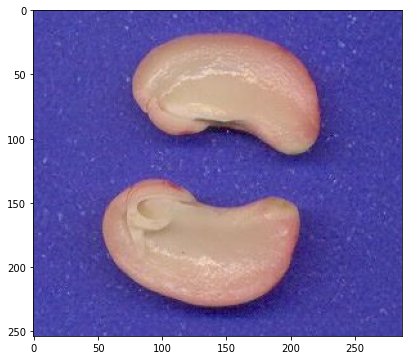

In [25]:
imagem2_cv2 = cv2.imread("sementes2.jpg")
imagem2 = cv2.cvtColor(imagem2_cv2, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem2)
plt.show()

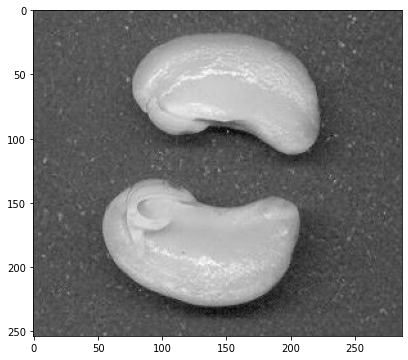

In [26]:
imagem_cinza2 = cv2.cvtColor(imagem2_cv2, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_cinza2, cmap = 'gray')
plt.show()

In [27]:
# Leitura das dimensões da imagem
[x, y] = np.shape(imagem_cinza2)
print(x, y)

254 287


In [28]:
# Separação dos canais da imagem
imagem_vermelha2, imagem_verde2, imagem_azul2 = cv2.split(imagem2)

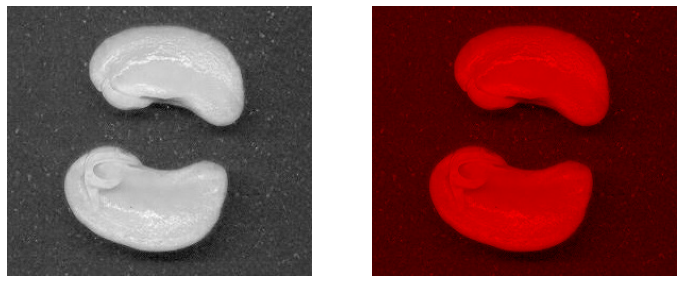

In [29]:
# Visualização da parte vermelha
zeros = np.zeros(imagem2.shape[:2], dtype="uint8")
fig = plt.figure(figsize=(12, 6))
plt.subplot(121); plt.axis("off"); plt.imshow(imagem_vermelha2, cmap = 'gray')
plt.subplot(122); plt.axis("off"); plt.imshow(cv2.merge([imagem_vermelha2, zeros, zeros]))
plt.show()

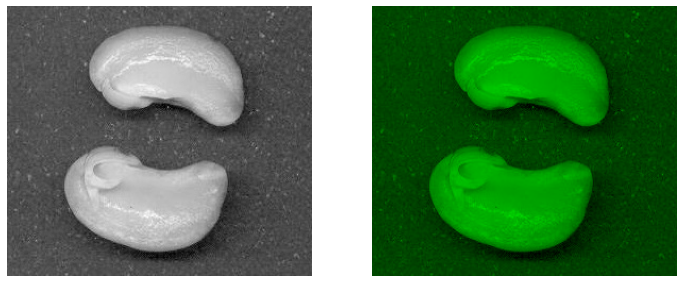

In [30]:
# Visualização da parte verde
fig = plt.figure(figsize=(12, 6))
plt.subplot(121); plt.axis("off"); plt.imshow(imagem_verde2, cmap = 'gray')
plt.subplot(122); plt.axis("off"); plt.imshow(cv2.merge([zeros, imagem_verde2, zeros]))
plt.show()

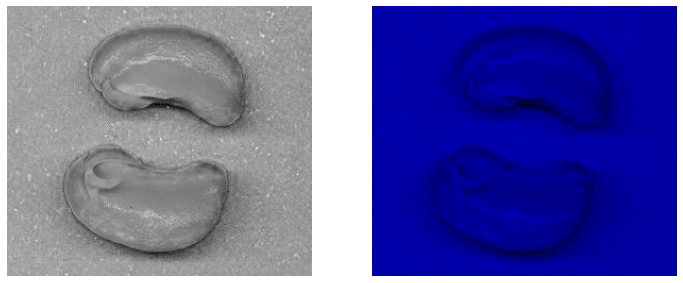

In [31]:
# Visualização da parte azul
fig = plt.figure(figsize=(12, 6))
plt.subplot(121); plt.axis("off"); plt.imshow(imagem_azul2, cmap = 'gray')
plt.subplot(122); plt.axis("off"); plt.imshow(cv2.merge([zeros, zeros, imagem_azul2]))
plt.show()

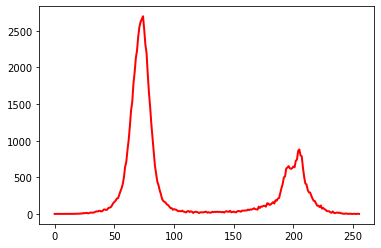

In [32]:
# Histograma vermelho
hist_red2 = cv2.calcHist([imagem2],[0],None,[256],[0,256])
plt.plot(hist_red2,color='red',lw=2)
plt.show()

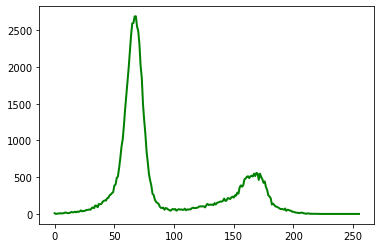

In [33]:
# Histograma verde
hist_green2 = cv2.calcHist([imagem2],[1],None,[256],[0,256])
plt.plot(hist_green2,color='green',lw=2)
plt.show()

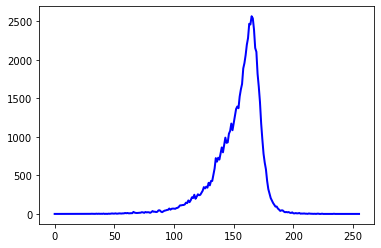

In [34]:
# Histograma azul
hist_blue2 = cv2.calcHist([imagem2],[2],None,[256],[0,256])
plt.plot(hist_blue2,color='blue',lw=2)
plt.show()

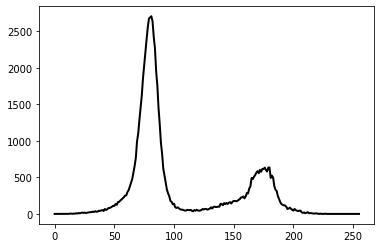

In [35]:
# Histograma cinza
hist2 = cv2.calcHist([imagem_cinza2],[0],None,[256],[0,256])
plt.plot(hist2,color='black',lw=2)
plt.show()

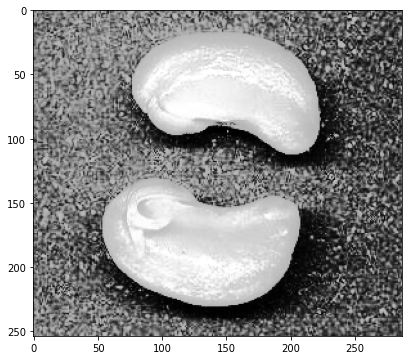

In [36]:
# Equalização de histograma
imagem_equalizada2 = cv2.equalizeHist(imagem_cinza2)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_equalizada2, cmap = 'gray')
plt.show()

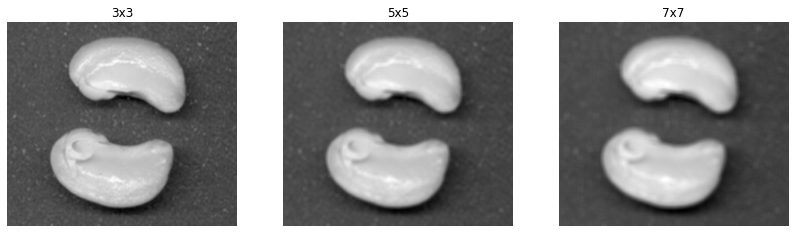

In [37]:
# Filtro da média
imagem2_media3 = cv2.blur(imagem_cinza2,(3,3))
imagem2_media5 = cv2.blur(imagem_cinza2,(5,5))
imagem2_media7 = cv2.blur(imagem_cinza2,(7,7))

fig = plt.figure(figsize=(14, 8))
plt.subplot(131);plt.axis("off"); plt.imshow(imagem2_media3,cmap='gray')
plt.title("3x3")
plt.subplot(132);plt.axis("off"); plt.imshow(imagem2_media5,cmap='gray')
plt.title("5x5")
plt.subplot(133);plt.axis("off"); plt.imshow(imagem2_media7,cmap='gray')
plt.title("7x7")
plt.show()

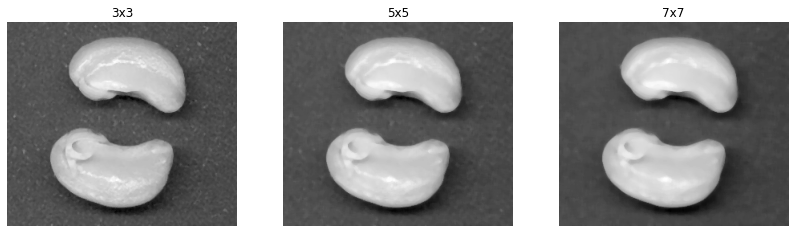

In [38]:
# Filtro da mediana
imagem2_mediana3 = cv2.medianBlur(imagem_cinza2,3)
imagem2_mediana5 = cv2.medianBlur(imagem_cinza2,5)
imagem2_mediana7 = cv2.medianBlur(imagem_cinza2,7)

fig = plt.figure(figsize=(14, 8))
plt.subplot(131);plt.axis("off"); plt.imshow(imagem2_mediana3,cmap='gray')
plt.title("3x3")
plt.subplot(132);plt.axis("off"); plt.imshow(imagem2_mediana5,cmap='gray')
plt.title("5x5")
plt.subplot(133);plt.axis("off"); plt.imshow(imagem2_mediana7,cmap='gray')
plt.title("7x7")
plt.show()

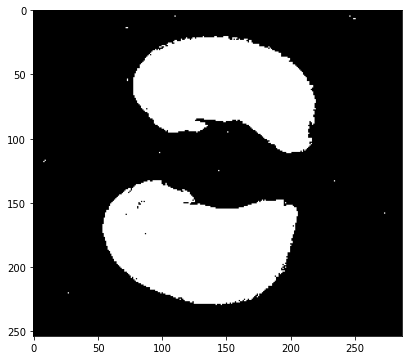

In [39]:
# Aplicando filtro do limiar
T,imagem_limiar2 = cv2.threshold(imagem_cinza2,135, 255,cv2.THRESH_BINARY)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_limiar2, cmap = 'gray')
plt.show()

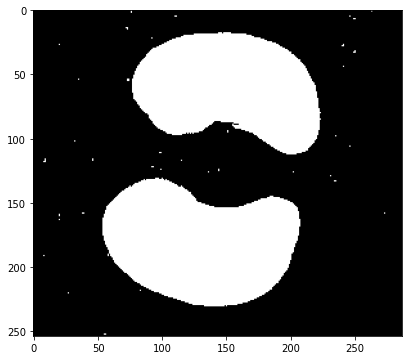

In [40]:
# Aplicando o filtro do limiar na componente vermelha
T,imagem_vermelha_limiar2 = cv2.threshold(imagem_vermelha2,115, 255,cv2.THRESH_BINARY)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_vermelha_limiar2, cmap = 'gray')
plt.show()

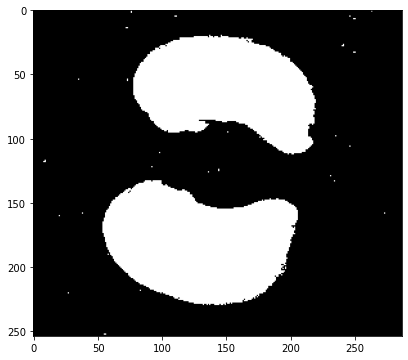

In [41]:
# Aplicando o filtro do limiar na componente verde
T,imagem_verde_limiar2 = cv2.threshold(imagem_verde2,115, 255,cv2.THRESH_BINARY)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_verde_limiar2, cmap = 'gray')
plt.show()

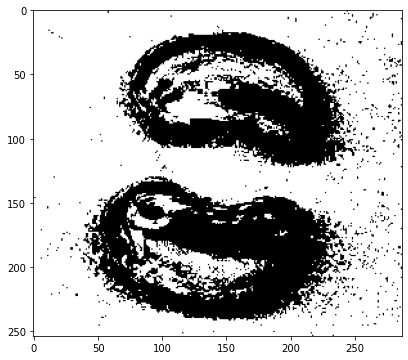

In [42]:
# Aplicando o filtro do limiar na componente azul
T,imagem_azul_limiar2 = cv2.threshold(imagem_azul2,150, 255,cv2.THRESH_BINARY)
fig = plt.figure(figsize=(10, 6))
plt.imshow(imagem_azul_limiar2, cmap = 'gray')
plt.show()

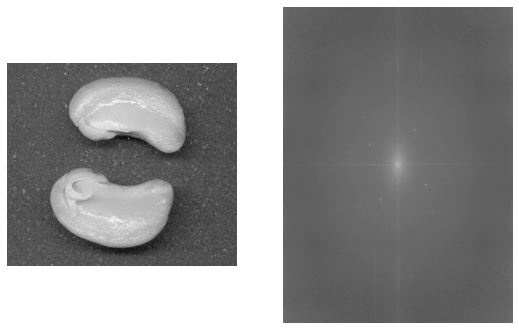

In [43]:
# Visualizando o espectro de magnitude da transformada de Fourier por meio da Transformada de Fourier Rápida (FFT)
f = np.fft.fft2(imagem_cinza2)
fshift2 = np.fft.fftshift(f)
magnitude_spectrum2 = 100*np.log(np.abs(fshift))

fig = plt.figure(figsize=(14,10))
plt.subplot(131); plt.axis("off"); plt.imshow(imagem_cinza2,cmap='gray')
plt.subplot(132); plt.axis("off"); plt.imshow(magnitude_spectrum2,cmap='gray')

plt.show()

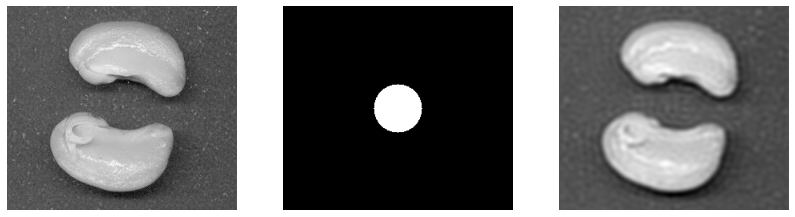

In [44]:
# Aplicando filtro passa-baixas no domínio da frequência
raio = 30
mask = np.zeros_like(imagem_cinza2)


cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), raio, (255,255,255), -1)[0]


dft_shift_masked = np.multiply(fshift2,mask) / 255
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked)
imagem2_filtrada1 = np.abs(img_filtered).clip(0,255).astype(np.uint8)

fig = plt.figure(figsize=(14,10))
plt.subplot(131); plt.axis("off"); plt.imshow(imagem_cinza2,cmap='gray')
plt.subplot(132); plt.axis("off"); plt.imshow(mask,cmap='gray')
plt.subplot(133); plt.axis("off"); plt.imshow(imagem2_filtrada1,cmap='gray')

plt.show()

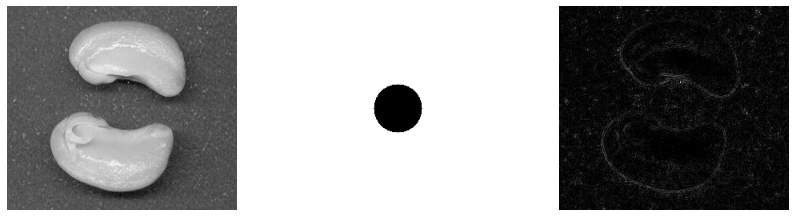

In [45]:
# Aplicando filtro passa-altas no domínio da frequência
raio = 30
mask = np.zeros_like(imagem_cinza2)
cv2.circle(mask, (cx,cy), raio, (255,255,255),-1)[0]


dft_shift_masked = np.multiply(fshift2, 255-mask) / 255
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked)
imagem2_filtrada2 = np.abs(img_filtered).clip(0,255).astype(np.uint8)

fig = plt.figure(figsize=(14,10))
plt.subplot(131); plt.axis("off"); plt.imshow(imagem_cinza2,cmap='gray')
plt.subplot(132); plt.axis("off"); plt.imshow(255-mask,cmap='gray')
plt.subplot(133); plt.axis("off"); plt.imshow(imagem2_filtrada2,cmap='gray')

plt.show()

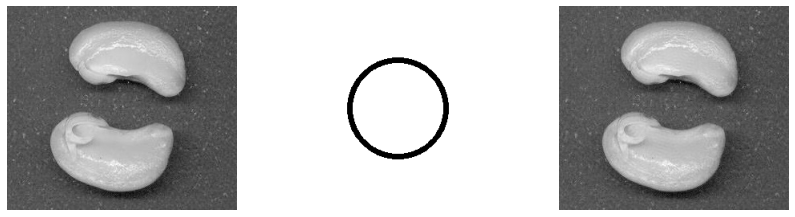

In [46]:
# Aplicando filtro rejeita-banda no domínio da frequência
radius = 60
mask = np.zeros_like(imagem_cinza2)
cv2.circle(mask, (cx,cy), radius, (255,255,255),5)[0]


dft_shift_masked = np.multiply(fshift2, 255-mask) / 255
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked)
imagem2_filtrada3 = np.abs(img_filtered).clip(0,255).astype(np.uint8)

fig = plt.figure(figsize=(14,10))
plt.subplot(131); plt.axis("off"); plt.imshow(imagem_cinza2,cmap='gray')
plt.subplot(132); plt.axis("off"); plt.imshow(255-mask,cmap='gray')
plt.subplot(133); plt.axis("off"); plt.imshow(imagem2_filtrada3,cmap='gray')

plt.show()

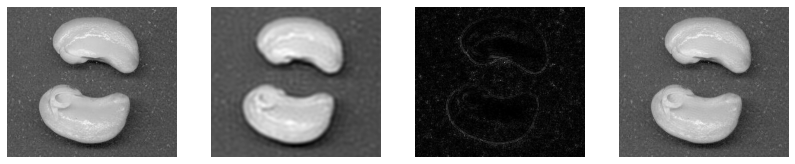

In [47]:
fig = plt.figure(figsize=(14,10))
plt.subplot(141); plt.axis("off"); plt.imshow(imagem_cinza2,cmap='gray')
plt.subplot(142); plt.axis("off"); plt.imshow(imagem2_filtrada1,cmap='gray')
plt.subplot(143); plt.axis("off"); plt.imshow(imagem2_filtrada2,cmap='gray')
plt.subplot(144); plt.axis("off"); plt.imshow(imagem2_filtrada3,cmap='gray')

In [48]:
def encontra_branco_leitoso(ranges, img):
  max_column = np.shape(img)[0]
  max_row = np.shape(img)[1]
  new_img = np.zeros((max_column, max_row))
  for column in range(0,max_column):
    for row in range(0,max_row):
      if img[column][row][0] in range(ranges[0][0], ranges[0][1]) and img[column][row][1] in range(ranges[1][0], ranges[1][1]) and img[column][row][2] in range(ranges[2][0], ranges[2][1]):
        new_img[column][row] = 255
  fig = plt.figure(figsize=(10, 6))
  plt.imshow(new_img, cmap = 'gray')
  plt.show()
  return new_img

In [49]:
def fload(img, column, row, max_column, max_row, new_start, color, new_color):
  new_start[2] +=1
  img[column][row] = new_color
  if column != 0 and row != 0 and img[column-1][row-1] == color:
    new_start, img = fload(img, column-1, row-1, max_column, max_row, new_start, color, new_color)
  if column != 0 and img[column-1][row] == color:
    new_start, img = fload(img, column-1, row, max_column, max_row, new_start, color, new_color)
  if column != 0 and row != max_row and img[column-1][row+1] == color:
    new_start, img = fload(img, column-1, row+1, max_column, max_row, new_start, color, new_color)
  if row != 0 and img[column][row-1] == color:
    new_start, img = fload(img, column, row-1, max_column, max_row, new_start, color, new_color)
  if row != max_row and img[column][row+1] == color:
    new_start, img = fload(img, column, row+1, max_column, max_row, new_start, color, new_color)
  if column != max_column and row != 0 and img[column+1][row-1] == color:
    new_start, img = fload(img, column+1, row-1, max_column, max_row, new_start, color, new_color)
  if column != max_column and img[column+1][row] == color:
    new_start, img = fload(img, column+1, row, max_column, max_row, new_start, color, new_color)
  if column != max_column and row != max_row and img[column+1][row+1] == color:
    new_start, img = fload(img, column+1, row+1, max_column, max_row, new_start, color, new_color)
  return new_start, img

In [50]:
def run_fload(original_img):
  img = original_img.copy()
  start = [0, 0, 0]
  max_column = np.shape(img)[0]
  max_row = np.shape(img)[1]
  for column in range(0,max_column):
    for row in range(0,max_row):
      if img[column][row] == 255:
        new_start = [column, row, 0]
        new_start, img = fload(img, column, row, max_column, max_row, new_start, 255, 254)
        if new_start[2] > start[2]:
          start = new_start
  _, img = fload(img, start[0], start[1], max_column, max_row, [0,0,0], 254, 255)
  for column in range(0,max_column):
    for row in range(0,max_row):
      if img[column][row] == 254:
        new_start = [column, row, 0]
        new_start, img = fload(img, column, row, max_column, max_row, new_start, 254, 0)
  return img

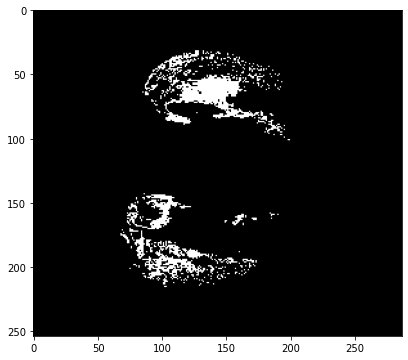

In [51]:
img = encontra_branco_leitoso([[200,215],[170,185],[148,160]],imagem2)

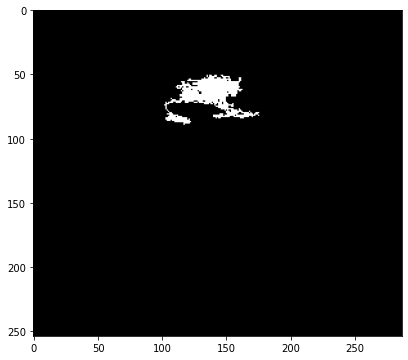

In [52]:
img = run_fload(img)
fig = plt.figure(figsize=(10, 6))
plt.imshow(img, cmap = 'gray')
plt.show()